In [3]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [4]:
df = pd.read_csv("gas_turbines.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
X = df.drop(df.columns[7],axis = 1)
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [7]:
Y = df['TEY']

In [8]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()
model.add(Dense(12, input_dim=10,  activation='relu')) #input layer
model.add(Dense(1, activation='linear')) #output layer

In [10]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [11]:
history = model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=10)

Epoch 1/50
1008/1008 [==============================] - 3s 2ms/step - loss: 286.9926 - mean_squared_error: 286.9926 - val_loss: 102.5426 - val_mean_squared_error: 102.5426
Epoch 2/50
1008/1008 [==============================] - 3s 3ms/step - loss: 60.9878 - mean_squared_error: 60.9878 - val_loss: 68.8777 - val_mean_squared_error: 68.8777
Epoch 3/50
1008/1008 [==============================] - 3s 3ms/step - loss: 29.8217 - mean_squared_error: 29.8217 - val_loss: 27.7171 - val_mean_squared_error: 27.7171
Epoch 4/50
1008/1008 [==============================] - 2s 2ms/step - loss: 15.6409 - mean_squared_error: 15.6409 - val_loss: 12.1252 - val_mean_squared_error: 12.1252
Epoch 5/50
1008/1008 [==============================] - 2s 2ms/step - loss: 9.0595 - mean_squared_error: 9.0595 - val_loss: 9.1493 - val_mean_squared_error: 9.1493
Epoch 6/50
1008/1008 [==============================] - 2s 2ms/step - loss: 5.2963 - mean_squared_error: 5.2963 - val_loss: 5.9295 - val_mean_squared_error: 5.9

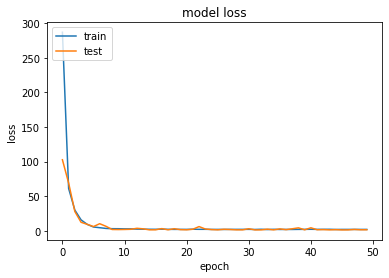

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()